In [22]:
import pretty_midi
midi_data = pretty_midi.PrettyMIDI('G:/MLA_datasets/1289821/PHENICX-Anechoic_1/PHENICX-Anechoic/annotations/beethoven/bassoon_o.mid')
print("duration:",midi_data.get_end_time())
print(f'{"note":>10} {"start":>10} {"end":>10}')
for instrument in midi_data.instruments:
    print("instrument:", instrument.program);
    for note in instrument.notes:
        print(f'{note.pitch:10} {note.start:10} {note.end:10}')

duration: 127.5
      note      start        end
instrument: 0
        57        2.4        3.0
        61        2.4        3.0
        59        7.2        7.8
        56        7.2        7.8
        55       12.0       12.6
        43       12.0       12.6
        50       16.8       18.0
        62       16.8       18.0
        57       18.0       19.2
        45       18.0       19.2
        50       19.2 20.400000000000002
        41       19.2 20.400000000000002
        55 20.400000000000002       21.6
        40 20.400000000000002       21.6
        53       21.6 23.400000000000002
        41       21.6 23.400000000000002
        53 23.400000000000002       24.0
        41 23.400000000000002       24.0
        52       24.0       24.6
        40       24.0       24.6
        57 26.400000000000002       27.6
        61 26.400000000000002       27.6
        52       27.6       28.8
        57       27.6       28.8
        49       28.8 29.400000000000002
        52       28.8 29

In [30]:
import numpy as np
import pretty_midi

def generate_posteriorgrams(midi_file, audio_length, hop_size, sample_rate):
    """
    Generate onset and activation posteriorgrams from a MIDI file.

    Parameters:
        midi_file (str): Path to the MIDI file.
        audio_length (float): Length of the audio segment in seconds.
        hop_size (int): Hop size in samples (e.g., 512).
        sample_rate (int): Audio sample rate (e.g., 22050).

    Returns:
        onset_posteriorgram (np.ndarray): Binary matrix of onsets (pitch x time frames).
        activation_posteriorgram (np.ndarray): Binary matrix of activations (pitch x time frames).
    """
    # Temporal resolution (seconds per frame)
    time_resolution = hop_size / sample_rate
    num_frames = int(np.ceil(audio_length / time_resolution))
    num_pitches = 128  # MIDI pitches range from 0 to 127

    # Initialize posteriorgrams
    onset_posteriorgram = np.zeros((num_pitches, num_frames))
    activation_posteriorgram = np.zeros((num_pitches, num_frames))

    # Load MIDI file
    midi_data = pretty_midi.PrettyMIDI(midi_file)

    # Process each note in the MIDI file
    for note in midi_data.instruments[0].notes:  # Assuming a single instrument
        pitch = note.pitch
        onset_time = note.start
        offset_time = note.end

        # Convert times to frame indices
        onset_frame = int(np.round(onset_time / time_resolution))
        offset_frame = int(np.round(offset_time / time_resolution))

        # Populate onset posteriorgram
        if 0 <= onset_frame < num_frames:
            onset_posteriorgram[pitch, onset_frame] = 1

        # Populate activation posteriorgram
        for frame in range(onset_frame, min(offset_frame, num_frames)):
            activation_posteriorgram[pitch, frame] = 1

    return onset_posteriorgram, activation_posteriorgram

# Example usage
midi_file_path = "G:/MLA_datasets/1289821/PHENICX-Anechoic_1/PHENICX-Anechoic/annotations/beethoven/all.mid"
audio_length = 4.0  # Length of audio segment in seconds
hop_size = 512  # Hop size in samples
sample_rate = 22050  # Audio sample rate

onset, activation = generate_posteriorgrams(midi_file_path, audio_length, hop_size, sample_rate)
import os

# Ensure the directory exists
output_dir = "G:/MLA_datasets/data/"
os.makedirs(output_dir, exist_ok=True)

# Save the posteriorgrams
np.save(os.path.join(output_dir, "onset0"), onset)
np.save(os.path.join(output_dir, "activation_posteriorgram0"), activation)

print("Onset Posteriorgram Shape:", onset.shape)
print("Activation Posteriorgram Shape:", activation.shape)


Onset Posteriorgram Shape: (128, 173)
Activation Posteriorgram Shape: (128, 173)


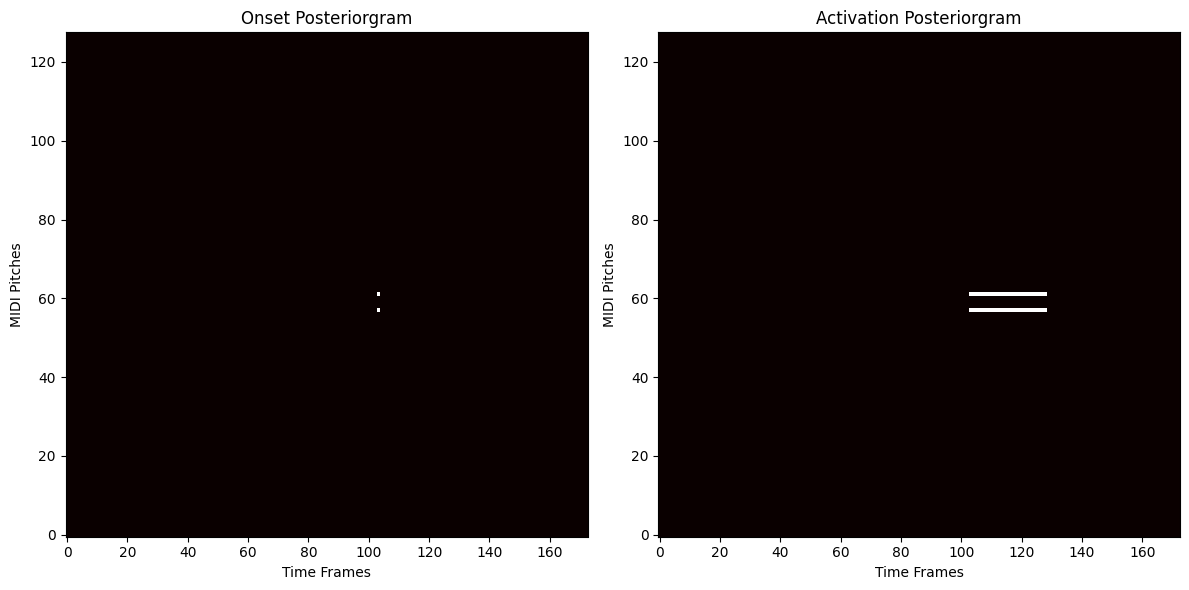

In [31]:
import matplotlib.pyplot as plt

def visualize_posteriorgrams(onset, activation):
    """
    Visualize the onset and activation posteriorgrams.
    
    Parameters:
        onset (np.ndarray): Onset posteriorgram matrix (pitch x time frames).
        activation (np.ndarray): Activation posteriorgram matrix (pitch x time frames).
    """
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    # Onset Posteriorgram
    axes[0].imshow(onset, aspect="auto", origin="lower", cmap="hot")
    axes[0].set_title("Onset Posteriorgram")
    axes[0].set_xlabel("Time Frames")
    axes[0].set_ylabel("MIDI Pitches")
    
    # Activation Posteriorgram
    axes[1].imshow(activation, aspect="auto", origin="lower", cmap="hot")
    axes[1].set_title("Activation Posteriorgram")
    axes[1].set_xlabel("Time Frames")
    axes[1].set_ylabel("MIDI Pitches")
    
    plt.tight_layout()
    plt.show()

# Load the saved matrices
onset = np.load(os.path.join(output_dir, "onset0.npy"))
activation = np.load(os.path.join(output_dir, "activation_posteriorgram0.npy"))

# Visualize
visualize_posteriorgrams(onset, activation)


In [34]:
len(onset[0])

173

In [38]:
128*4/173

2.959537572254335

In [37]:
for i in range(len(onset)):
    for j in range(len(onset[0])):
        if activation[i][j]==1:
            print((i,j))

(57, 103)
(57, 104)
(57, 105)
(57, 106)
(57, 107)
(57, 108)
(57, 109)
(57, 110)
(57, 111)
(57, 112)
(57, 113)
(57, 114)
(57, 115)
(57, 116)
(57, 117)
(57, 118)
(57, 119)
(57, 120)
(57, 121)
(57, 122)
(57, 123)
(57, 124)
(57, 125)
(57, 126)
(57, 127)
(57, 128)
(61, 103)
(61, 104)
(61, 105)
(61, 106)
(61, 107)
(61, 108)
(61, 109)
(61, 110)
(61, 111)
(61, 112)
(61, 113)
(61, 114)
(61, 115)
(61, 116)
(61, 117)
(61, 118)
(61, 119)
(61, 120)
(61, 121)
(61, 122)
(61, 123)
(61, 124)
(61, 125)
(61, 126)
(61, 127)
(61, 128)
